# AAG02

**Short Description:** Use the functions from previous task to plot a CDF or PMF. The data used as input should be obtained using Spidering/Scraping or Logging techniques

## Source code

In [132]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Sample of the data

**Note:** The data used as input was taken from the `campus_by_car` folder of this publicly available dataset: https://github.com/oliveiraleo/LoRa-RSSI-dataset-outdoor/

In [133]:
data = pd.read_csv('./data/task2/raw/2022-11-26_22-00-00_Full-Collected-data.csv', sep=",")
print(data.head())

       Time  GPS Time  id   Latitude  Longitude  Altitude  GPS Precision  \
0  18:40:04  21:40:04   0 -21.778066 -43.371483     905.1              1   
1  18:40:12  21:40:04   1 -21.778066 -43.371483     905.1              1   
2  18:40:20  21:40:12   2 -21.778066 -43.371483     905.1              1   
3  18:40:29  21:40:20   3 -21.778066 -43.371483     905.1              1   
4  18:40:37  21:40:29   4 -21.778065 -43.371483     905.1              1   

   # Satellites  ED RSSI  GW RSSI  
0            14     -102     -112  
1            14     -106     -112  
2            14     -118     -114  
3            14     -112     -110  
4            14     -113     -115  


From the data available above, it was decided to use the column `ED RSSI` for this task

In [134]:
rssi = data["ED RSSI"]
print(rssi.head())

0   -102
1   -106
2   -118
3   -112
4   -113
Name: ED RSSI, dtype: int64


## ECDF plot function

Below goes the code from the previous task with some visual adaptations as the data is different

In [135]:
def plot_ecdf(data):
    # Compute ECDF
    x = np.sort(data)
    n = int(len(x))#.size
    y = np.arange(1, n+1) / n

    # Plotting the ECDF
    plt.figure(figsize=(12,8))
    plt.plot(x, y, marker='x', linestyle='-')
    plt.xticks(np.arange(min(x), max(x)+2, 2), rotation=-45)
    plt.yticks(np.arange(0, 1.01, 0.05))
    plt.xlabel('RSSI Values')
    plt.ylabel('ECDF')
    plt.title('Empirical Cumulative Distribution Function')
    plt.grid(axis='both', linestyle=':') # add some lines to enhance visualization

    plt.show()


### Plotting the full data

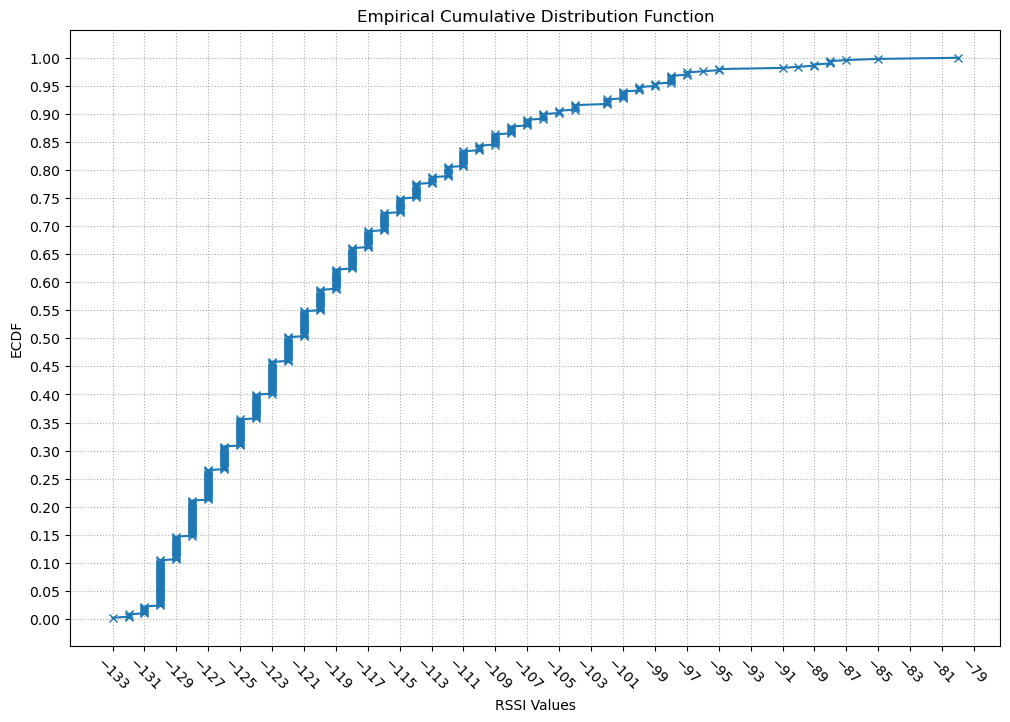

In [136]:
plot_ecdf(rssi)

If the data is described (see the code below), it is possible to see that the distance between the first quartile and the minimum value is 6 and the distance between the third quartile and the maximum value is 34.25. This may help explain why the are more points grouped on the left side of the plot than on the right side.

Another point to consider is that as many values repeat, this causes the graph to group them and give the appearance of straight lines on those repeated values. The more the value repeats, greater is the number of "stacked" points around it.

In [137]:
rssi.describe()

count    498.000000
mean    -119.206827
std        9.709637
min     -133.000000
25%     -127.000000
50%     -122.000000
75%     -114.250000
max      -80.000000
Name: ED RSSI, dtype: float64